# ****Clustering****

Steps involved in the Clustering

1. Elbow Method to determine the number of clusters to be formed
2. Clustering via Kmeans and Agglomerative Clustering
2. Examining the clusters formed 

# ****Importing Libraries****

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
import plotly.graph_objects as go
import plotly.offline as py

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)    

### **Loading Dataset**

In [9]:
df = pd.read_csv("Mall_Customers.csv")

In [11]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### ***Cleaning Data and Pre Processing***

### Dropping the CustomerID Column

In [15]:
df.drop('CustomerID', axis = True, inplace  = True)

In [17]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


### **Checking if null values exists**

In [20]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**We will check for outliers in the data using the scatter plot**

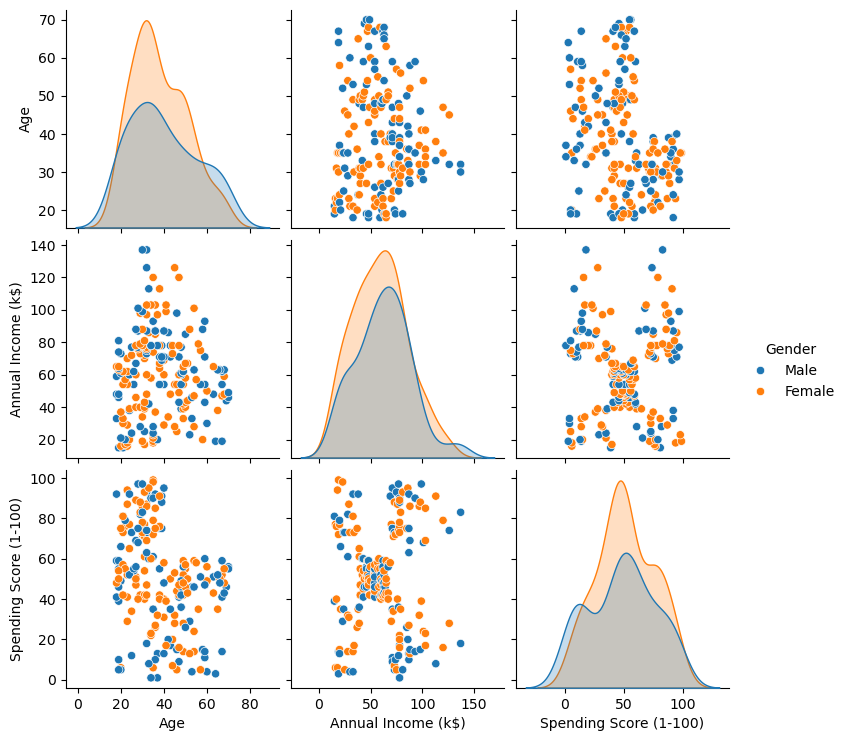

In [23]:
sns.pairplot(df[["Age","Annual Income (k$)","Spending Score (1-100)","Gender"]], hue="Gender")

*There isnt any outliers detected from the observation*

**Now let us Convert the categorical value into a numerical one**

In [27]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

**The data is now clean and processed and ready to be fitted into algorithms**

In [30]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init='k-means++', n_init = 10)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)


### **Elbow Method to determine the number of clusters to be formed:**

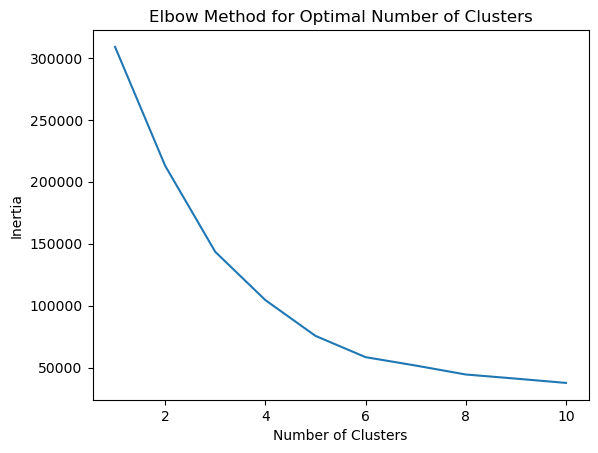

In [33]:
plt.plot(range(1,11), wcss)
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

The above cell indicates that 5 will be an optimal number of clusters for this data. Next, we will be fitting the K Means and Agglomerative Clustering Model to get the final clusters.



# **K Means Clustering**

In [37]:
km = KMeans(n_clusters = 5,init='k-means++', n_init = 10, max_iter=50)
km.fit(df)
labels = km.labels_
labels_df = pd.DataFrame(labels)
df['Clusters'] = labels_df

In [39]:
print(labels)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 3 4 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 2 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 2 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


In [40]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,19,15,39,4
1,1,21,15,81,3
2,0,20,16,6,4
3,0,23,16,77,3
4,0,31,17,40,4


## ****Evaluating Clusters****

**To examine the clusters formed let's have a look at the 3-D distribution of the clusters.**

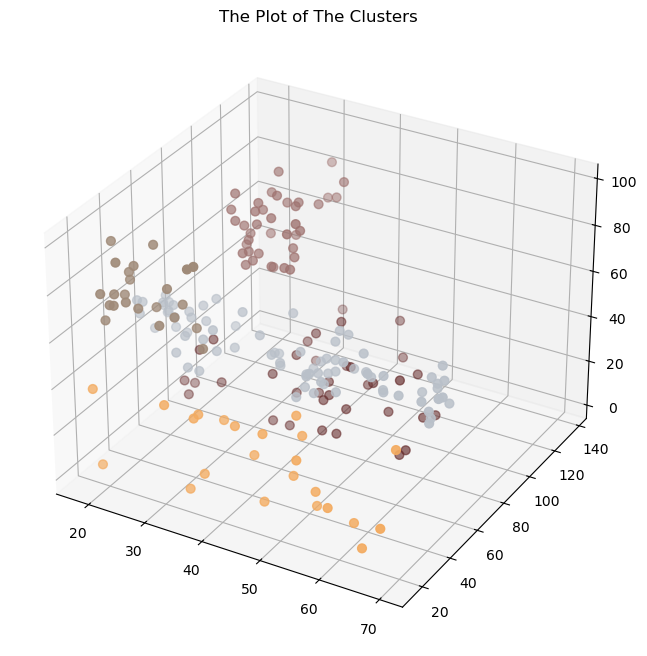

In [45]:
fig = plt.figure(figsize = (10,8))
cmap = colors.ListedColormap((["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]))
ax = plt.subplot(111, projection ='3d',label ='bla')
ax.scatter(df.iloc[:, 1], df.iloc[:, 2], df.iloc[:, 3], s=40, c=df["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot of The Clusters")
plt.show()

Since this is an unsupervised clustering. We lack a labelled feature with which to assess or grade our model. This section aims to analyse the patterns in the clusters that were created and identify the types of patterns in the clusters.

For that, we will be having a look at the data in light of clusters via exploratory data analysis and drawing conclusions.

Let us have a look at the overall distribution of clustering

Text(0.5, 1.0, 'Distribution of Clusters')

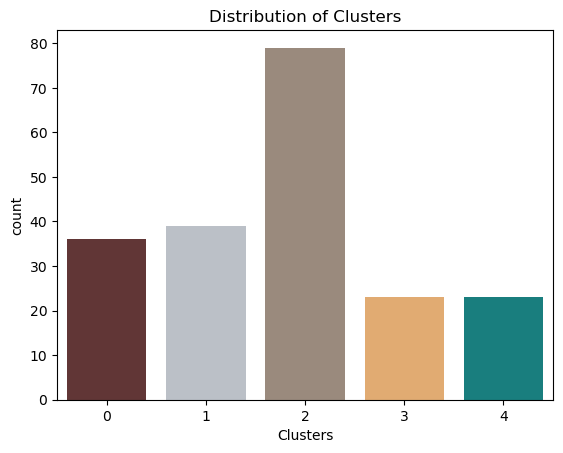

In [48]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60","#088F8F"]

pl = sns.countplot(x= df['Clusters'],palette = pal)
pl.set_title("Distribution of Clusters")

Seems to be fairly distributed with large number of records put into cluster two

Text(0.5, 1.0, "Cluster's Profile Based On Income And Spending")

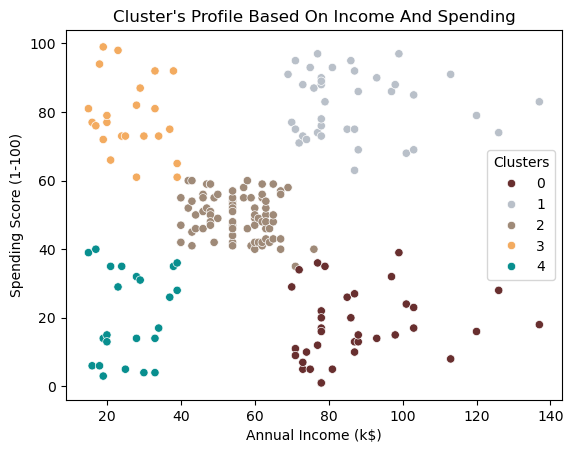

In [51]:
pl = sns.scatterplot(data=df, x= 'Annual Income (k$)', y='Spending Score (1-100)', hue = 'Clusters',palette = pal)
pl.set_title("Cluster's Profile Based On Income And Spending")

**Customers Annual income vs Spending score plotted can be analysed as follows**:
* Cluster 0 - High spending high income group
* Cluster 1 - Low spending High income group
* Cluster 2 - Average spending Average income group
* Cluster 3 - High spending with low income group
* Cluster 4 - Low spending low income group

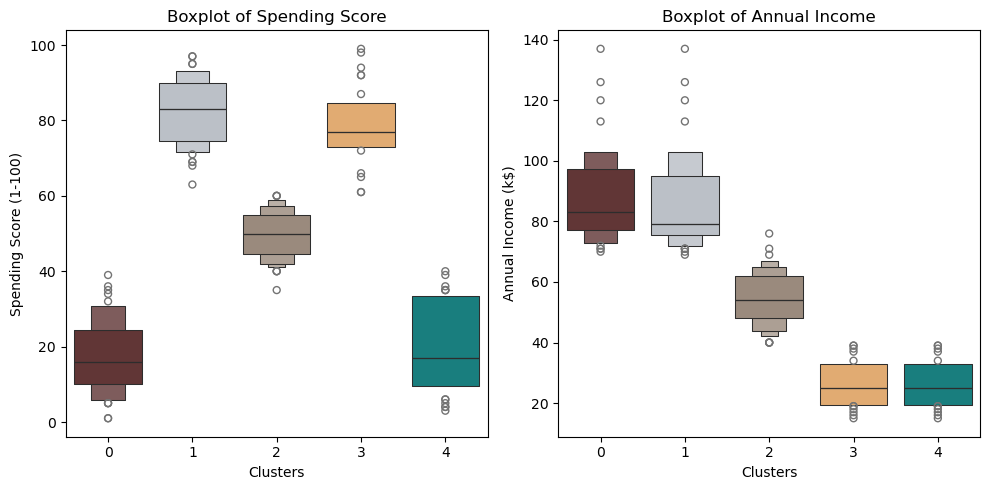

In [54]:
fig, axs = plt.subplots(1, 2, figsize=(10,5)) # Creates a figure with two subplots side by side

sns.boxenplot(x=df["Clusters"], y=df['Spending Score (1-100)'], palette=pal, ax=axs[0])
axs[0].set_title('Boxplot of Spending Score')

sns.boxenplot(x=df["Clusters"], y=df['Annual Income (k$)'], palette=pal, ax=axs[1])
axs[1].set_title('Boxplot of Annual Income')

plt.tight_layout() 
plt.show()

**From the above plot, it can be clearly seen that cluster 0 and cluster 3 is our biggest set of customers closely followed by cluster 3.**

**Now let us analyse with Agglomerative Clustering and examine it.**

# **Agglomerative Clustering**

In [59]:
ag = AgglomerativeClustering(n_clusters = 5)
ag.fit(df)
ag_labels = ag.labels_
ag_labels_df = pd.DataFrame(ag_labels)
df["Ag_Clusters"] = ag_labels_df

In [61]:
print(ag_labels)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 0 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


Text(0.5, 1.0, 'Distribution of Clusters')

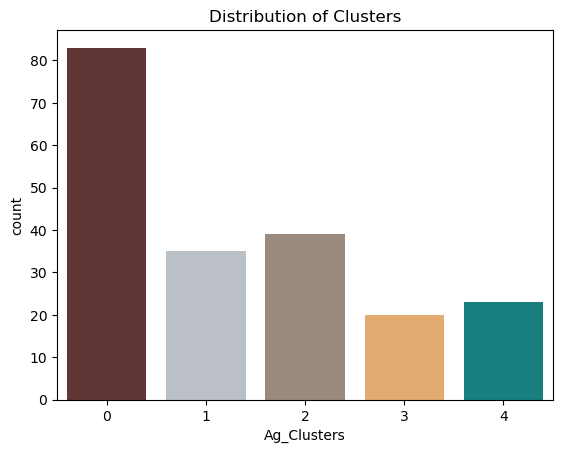

In [63]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60","#088F8F"]

pl = sns.countplot(x= df['Ag_Clusters'],palette = pal)
pl.set_title("Distribution of Clusters")

Text(0.5, 1.0, "Cluster's Profile Based On Income And Spending")

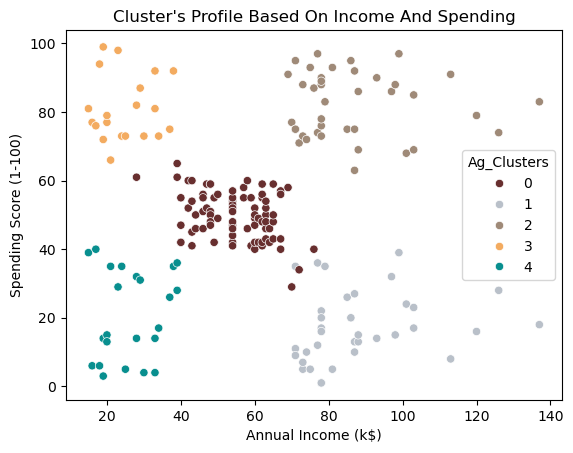

In [65]:
pl = sns.scatterplot(data=df, x= 'Annual Income (k$)', y='Spending Score (1-100)', hue = 'Ag_Clusters',palette = pal	)
pl.set_title("Cluster's Profile Based On Income And Spending")


**Customers Annual income vs Spending score plotted can be analysed as follows**:
* Cluster 0 - Average spending with Average income group
* Cluster 1 - Low spending High income group
* Cluster 2 - High spending High income group
* Cluster 3 - High spending low income group
* Cluster 4 - Low spending low income group

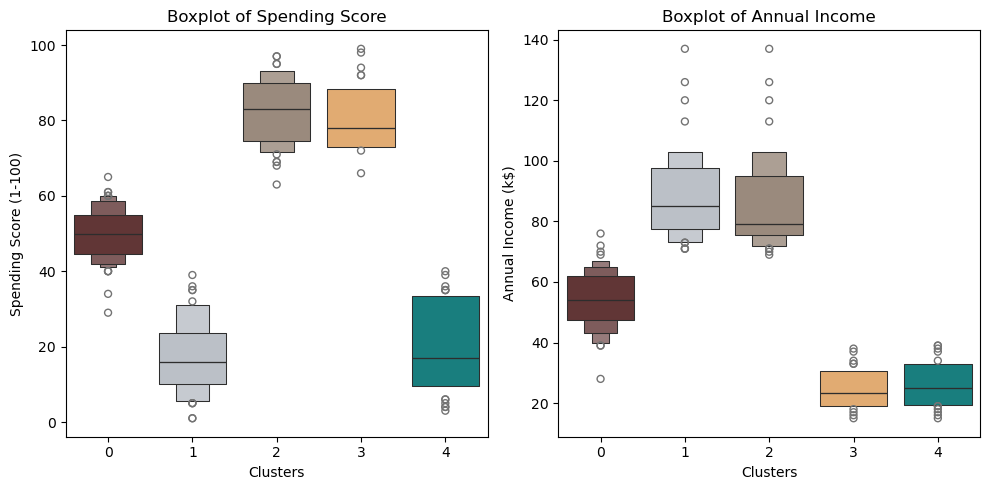

In [68]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5)) # Creates a figure with two subplots side by side

sns.boxenplot(x=df["Ag_Clusters"], y=df['Spending Score (1-100)'], palette=pal, ax=axs[0])
axs[0].set_title('Boxplot of Spending Score')
axs[0].set_xlabel('Clusters')


sns.boxenplot(x=df["Ag_Clusters"], y=df['Annual Income (k$)'], palette=pal, ax=axs[1])
axs[1].set_title('Boxplot of Annual Income')
axs[1].set_xlabel('Clusters')

plt.tight_layout() 
plt.show()

**From the above plot, it can be clearly seen that cluster 2 and cluster 3 are our biggest set of customers.**

We can see that both clustering algorithms give slightly different results, Let us see their performance with the silhouette score.



# ****Evaluating the model Performace****

In [73]:
silhouette_avg_km = silhouette_score(df, labels)
silhouette_avg_ag = silhouette_score(df, ag_labels)
print("The average silhouette_score for K means is :", silhouette_avg_km)
print("The average silhouette_score for  Aglomerative is :", silhouette_avg_ag)

The average silhouette_score for K means is : 0.4455360287376105
The average silhouette_score for  Aglomerative is : 0.4416181183210061


> *Both Models give similar results, which is failry good but not great.*

# **Conclusion**

In this project, I performed unsupervised clustering using K means and Agglomerative models. Dimensionality reduction was not required, followed by clustering. I came up with 5 clusters and further used them in Evaluating customers in clusters according to their income and spending. This can be used in planning better marketing strategies and attracting customers. Although the spending habits have shown some differences in the two algorithms, customers from cluster 3 can be considered to be the target Customers, since thier Spending score can be seen very high from both the Models.

## **Great Job!**